In [1]:
from training_4Stim import *
from scipy import stats
import pandas as pd

Load data

In [2]:
# BIPOLAR CELLS
loc = np.load('Model Input Normalised - BCs/bc_cluster_locations.npy')
ventral_bcs = np.where(loc == 'ventral')[0]
print('Nb of BCs')
print(len(ventral_bcs))
types_uv_center = np.load('Model Input Normalised - BCs/types_uv_center.npy')[ventral_bcs]
types_uv_surround = np.load('Model Input Normalised - BCs/types_uv_surround.npy')[ventral_bcs]
types_green_center = np.load('Model Input Normalised - BCs/types_green_center.npy')[ventral_bcs]
types_green_surround = np.load('Model Input Normalised - BCs/types_green_surround.npy')[ventral_bcs]

types = np.column_stack((types_uv_center, types_uv_surround, types_uv_surround,
                         types_green_center, types_green_surround, types_green_surround))

flicker_stim_uv = np.load('Model Input Normalised - BCs/uv_flicker_64Hz.npy')
flicker_stim_green = np.load('Model Input Normalised - BCs/green_flicker_64Hz.npy')
bcs_response_uv = np.load('Model Input Normalised - BCs/uv_avrg_resp_64Hz_norm.npy')[ventral_bcs].astype(np.float32)
bcs_response_green = np.load('Model Input Normalised - BCs/green_avrg_resp_64Hz_norm.npy')[ventral_bcs].astype(np.float32)

# Order: uv center, uv ring, uv surround, green center, green ring, green surround
bcs_uv_flicker = np.column_stack((flicker_stim_uv[:,0], 
                                  flicker_stim_uv[:,1],
                                  flicker_stim_uv[:,1],
                                  np.zeros(len(flicker_stim_uv[:,0])),
                                  np.zeros(len(flicker_stim_uv[:,0])),
                                  np.zeros(len(flicker_stim_uv[:,0])))).astype(np.float32)

bcs_green_flicker = np.column_stack((np.zeros(len(flicker_stim_green[:,0])),
                                     np.zeros(len(flicker_stim_green[:,0])),
                                     np.zeros(len(flicker_stim_green[:,0])),
                                     flicker_stim_green[:,0],
                                     flicker_stim_green[:,1],
                                     flicker_stim_green[:,1])).astype(np.float32)

chirp_stim = np.load('Model Input Normalised - BCs/chirp_stim_64Hz.npy')
bcs_response_chirp = np.load('Model Input Normalised - BCs/global_chirp_avrg_resp_64Hz_norm.npy')[ventral_bcs].astype(np.float32)
bcs_response_local_chirp = np.load('Model Input Normalised - BCs/local_chirp_avrg_resp_64Hz_norm.npy')[ventral_bcs].astype(np.float32)

# Order: uv center, uv ring, uv surround, green center, green ring, green surround
chirp_stim_full = np.column_stack((chirp_stim,
                                   chirp_stim,
                                   chirp_stim,
                                   chirp_stim, 
                                   chirp_stim, 
                                   chirp_stim)).astype(np.float32)

local_chirp_stim_full = np.column_stack((chirp_stim, 
                                         np.zeros(len(chirp_stim)),
                                         np.zeros(len(chirp_stim)),
                                         chirp_stim, 
                                         np.zeros(len(chirp_stim)),
                                         np.zeros(len(chirp_stim)))).astype(np.float32)

# AMACRINE CELLS
acs_response_chirp = np.load('Model Input Normalised - ACs/global_chirp_avrg_resp_64Hz_norm.npy').astype(np.float32)
acs_response_local_chirp = np.load('Model Input Normalised - ACs/local_chirp_avrg_resp_64Hz_norm.npy').astype(np.float32)

acs_flicker_stim_uv_1 = np.load('Model Input Normalised - ACs/uv_1_flicker_64Hz.npy')
acs_flicker_stim_uv_2 = np.load('Model Input Normalised - ACs/uv_2_flicker_64Hz.npy')
acs_flicker_stim_green_1 = np.load('Model Input Normalised - ACs/green_1_flicker_64Hz.npy')
acs_flicker_stim_green_2 = np.load('Model Input Normalised - ACs/green_2_flicker_64Hz.npy')

acs_response_uv_1 = np.load('Model Input Normalised - ACs/uv_1_avrg_resp_64Hz_norm.npy').astype(np.float32)
acs_response_uv_2 = np.load('Model Input Normalised - ACs/uv_2_avrg_resp_64Hz_norm.npy').astype(np.float32)
acs_response_green_1 = np.load('Model Input Normalised - ACs/green_1_avrg_resp_64Hz_norm.npy').astype(np.float32)
acs_response_green_2 = np.load('Model Input Normalised - ACs/green_2_avrg_resp_64Hz_norm.npy').astype(np.float32)


# Order: uv center, uv ring, uv surround, green center, green ring, green surround
acs_uv_flicker_1 = np.column_stack((acs_flicker_stim_uv_1[:,0], 
                                    acs_flicker_stim_uv_1[:,1],
                                    acs_flicker_stim_uv_1[:,2],
                                    np.zeros(len(acs_flicker_stim_uv_1[:,0])),
                                    np.zeros(len(acs_flicker_stim_uv_1[:,0])),
                                    np.zeros(len(acs_flicker_stim_uv_1[:,0])))).astype(np.float32)

acs_uv_flicker_2 = np.column_stack((acs_flicker_stim_uv_2[:,0], 
                                    acs_flicker_stim_uv_2[:,1],
                                    acs_flicker_stim_uv_2[:,2],
                                    np.zeros(len(acs_flicker_stim_uv_2[:,0])),
                                    np.zeros(len(acs_flicker_stim_uv_2[:,0])),
                                    np.zeros(len(acs_flicker_stim_uv_2[:,0])))).astype(np.float32)

acs_green_flicker_1 = np.column_stack((np.zeros(len(acs_flicker_stim_green_1[:,0])),
                                       np.zeros(len(acs_flicker_stim_green_1[:,0])),
                                       np.zeros(len(acs_flicker_stim_green_1[:,0])),
                                       acs_flicker_stim_green_1[:,0], 
                                       acs_flicker_stim_green_1[:,1],
                                       acs_flicker_stim_green_1[:,2])).astype(np.float32)

acs_green_flicker_2 = np.column_stack((np.zeros(len(acs_flicker_stim_green_2[:,0])),
                                       np.zeros(len(acs_flicker_stim_green_2[:,0])),
                                       np.zeros(len(acs_flicker_stim_green_2[:,0])),
                                       acs_flicker_stim_green_2[:,0], 
                                       acs_flicker_stim_green_2[:,1],
                                       acs_flicker_stim_green_2[:,2])).astype(np.float32)

penalty_matrix = np.exp((np.load('ipl_penalty.npy')[:,ventral_bcs])-1)
penalty_matrix_acs = np.exp(np.load('ipl_penalty_ac_ac.npy')-1)

acs_test_flicker = np.load('Model Input Normalised - ACs/test_sequences_flicker_64Hz.npy')
acs_test_responses = np.load('Model Input Normalised - ACs/test_sequences_responses_flicker_avrg_64Hz_norm.npy').astype(np.float32)

Nb of BCs
13


Load model and predict responses

In [3]:
# Create model
model = FullBCModel(cell_types = types,
                    num_pr = 6,
                    steady_state_steps=10,
                    ip_steady=np.ones(13),
                    rrp_steady=np.ones(13),
                    num_acl=25)

path = 'results/ventral/19/model.pth'
model.load_state_dict(torch.load(path))
model.eval()

FullBCModel(
  (glycinergic_amacrine_cells): AmacrineCellFeedback()
)

In [4]:
device = 'cpu'

x1 = torch.tensor(local_chirp_stim_full.astype(np.float32)).to(device)
x2 = torch.tensor(chirp_stim_full.astype(np.float32)).to(device)
x3 = torch.tensor(bcs_uv_flicker.astype(np.float32)).to(device)
x4 = torch.tensor(bcs_green_flicker.astype(np.float32)).to(device)
x5 = torch.tensor(acs_uv_flicker_1.astype(np.float32)).to(device)
x6 = torch.tensor(acs_green_flicker_1.astype(np.float32)).to(device)
x7 = torch.tensor(acs_uv_flicker_2.astype(np.float32)).to(device)
x8 = torch.tensor(acs_green_flicker_2.astype(np.float32)).to(device)

x9 = torch.tensor(acs_test_flicker.astype(np.float32)).to(device)

# Predict responses
y1_hat_bcs, internal_1, y1_hat_acs = model.forward(x1) # Local
y2_hat_bcs, internal_2, y2_hat_acs = model.forward(x2) # Global

y3_hat_bcs, internal_3, y3_hat_acs = model.forward(x3) # UV
y4_hat_bcs, internal_4, y4_hat_acs = model.forward(x4) # Green

y5_hat_bcs, internal_5, y5_hat_acs = model.forward(x5) # UV
y6_hat_bcs, internal_6, y6_hat_acs = model.forward(x6) # Green
y7_hat_bcs, internal_7, y7_hat_acs = model.forward(x7) # UV
y8_hat_bcs, internal_8, y8_hat_acs = model.forward(x8) # Green

_, _, y9_hat_acs = model.forward(x9) # Test sequences

Plot connectivity

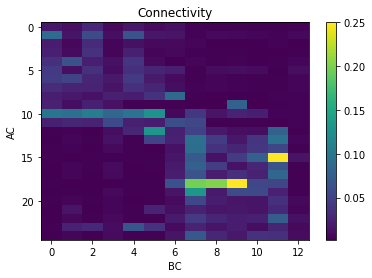

In [5]:
matrix_orig = torch.exp(model.glycinergic_amacrine_cells.log_bc_ac_weight).detach().numpy() # Sorted by IPL depth


plt.imshow(matrix_orig, vmax = 0.25, aspect = 'auto')
plt.colorbar()
plt.title('Connectivity')
plt.xlabel('BC')
plt.ylabel('AC')
#plt.savefig('Figures/model_19_connectivity.eps')
plt.show()

Calculate correlations

In [6]:
# BCs
corr_bcs = np.zeros((13,4))
y1_hat_bcs = y1_hat_bcs.detach().numpy()
y2_hat_bcs = y2_hat_bcs.detach().numpy()
y3_hat_bcs = y3_hat_bcs.detach().numpy()
y4_hat_bcs = y4_hat_bcs.detach().numpy()

for i in range(13):
    corr_bcs[i,0] = stats.pearsonr(bcs_response_local_chirp[i,:], y1_hat_bcs[i,:])[0]
    corr_bcs[i,1] = stats.pearsonr(bcs_response_chirp[i,:], y2_hat_bcs[i,:])[0]
    corr_bcs[i,2] = stats.pearsonr(bcs_response_uv[i,:], y3_hat_bcs[i,:])[0]
    corr_bcs[i,3] = stats.pearsonr(bcs_response_green[i,:], y4_hat_bcs[i,:])[0]
    
# ACs
corr_acs = np.zeros((25,4))
y1_hat_acs = y1_hat_acs.detach().numpy()
y2_hat_acs = y2_hat_acs.detach().numpy()
y5_hat_acs = y5_hat_acs.detach().numpy()
y6_hat_acs = y6_hat_acs.detach().numpy()
y7_hat_acs = y7_hat_acs.detach().numpy()
y8_hat_acs = y8_hat_acs.detach().numpy()

y9_hat_acs = y9_hat_acs.detach().numpy()
corr_acs_test = np.zeros(25)

for i in range(25): 
    corr_acs[i,0] = stats.pearsonr(acs_response_local_chirp[i,:], y1_hat_acs[i,:])[0]
    corr_acs[i,1] = stats.pearsonr(acs_response_chirp[i,:], y2_hat_acs[i,:])[0]
    
    uv_concat = np.concatenate((acs_response_uv_1[i,:], acs_response_uv_2[i,:]))
    uv_concat_hat = np.concatenate((y5_hat_acs[i,:], y7_hat_acs[i,:]))
    green_concat = np.concatenate((acs_response_green_1[i,:], acs_response_green_2[i,:]))
    green_concat_hat = np.concatenate((y6_hat_acs[i,:], y8_hat_acs[i,:]))

    corr_acs[i,2] = stats.pearsonr(uv_concat, uv_concat_hat)[0]
    corr_acs[i,3] = stats.pearsonr(green_concat, green_concat_hat)[0]
    
    corr_acs_test[i] = stats.pearsonr(acs_test_responses[i,:], y9_hat_acs[i,:])[0]

Construct DF for plotting

In [7]:
columns = ['Cell Class', 'Cluster', 'Stim', 'Correlation']
df = pd.DataFrame(columns = columns)
stim_list = ['Local Chirp', 'Global Chirp', 'UV Flicker', 'Green Flicker']

for i in np.arange(4):

    current_data  = {'Cell Class': list(np.repeat('BC', 13)),
                     'Cluster': list(np.arange(13)),
                     'Stim': list(np.repeat(stim_list[i], 13)),
                     'Correlation': list(corr_bcs[:,i])}                
    df = pd.concat([df, pd.DataFrame(current_data, columns=columns)],
                   ignore_index=True)
    
for i in np.arange(4):

    current_data  = {'Cell Class': list(np.repeat('AC', 25)),
                     'Cluster': list(np.arange(25)),
                     'Stim': list(np.repeat(stim_list[i], 25)),
                     'Correlation': list(corr_acs[:,i])}                
    df = pd.concat([df, pd.DataFrame(current_data, columns=columns)],
                   ignore_index=True)
    
    
current_data  = {'Cell Class': list(np.repeat('AC', 25)),
                 'Cluster': list(np.arange(25)),
                 'Stim': list(np.repeat('Test Flicker', 25)),
                 'Correlation': list(corr_acs_test)}                
df = pd.concat([df, pd.DataFrame(current_data, columns=columns)],
               ignore_index=True)

In [8]:
df

,Cell Class,Cluster,Stim,Correlation
0,BC,0,Local Chirp,0.437141
1,BC,1,Local Chirp,0.681294
2,BC,2,Local Chirp,0.414756
3,BC,3,Local Chirp,0.653826
4,BC,4,Local Chirp,0.482091
...,...,...,...,...
172,AC,20,Test Flicker,0.669680
173,AC,21,Test Flicker,0.681665
174,AC,22,Test Flicker,0.461059
175,AC,23,Test Flicker,0.750567


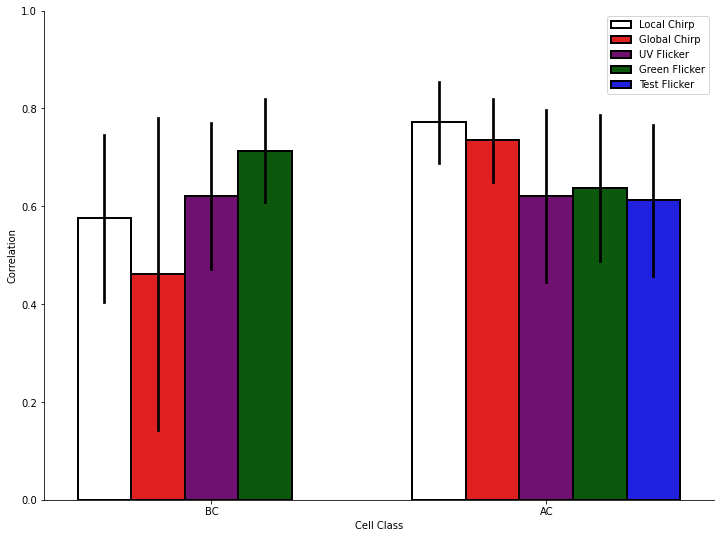

In [9]:
import seaborn as sns

plt.figure(figsize=(12,9))

sns.barplot(data=df, x="Cell Class", y="Correlation", hue="Stim", ci="sd", errcolor = 'black',
            palette=['white', 'red', 'purple', 'darkgreen', 'blue'], edgecolor = 'black', linewidth = 2)

plt.ylim([0,1])
plt.legend(loc=1, prop={'size': 10})
sns.despine()
#plt.savefig('Figures/model_19_performance.eps')
plt.show()

Plot responses

In [10]:
plot_bcs = [5, 8, 12]
plot_acs = [7, 14, 17]

In [11]:
# Normalize
y1_hat_bcs_baseline = np.zeros_like(y1_hat_bcs)
y2_hat_bcs_baseline = np.zeros_like(y2_hat_bcs)
y3_hat_bcs_baseline = np.zeros_like(y3_hat_bcs)
y4_hat_bcs_baseline = np.zeros_like(y4_hat_bcs)

y1_hat_bcs_norm = np.zeros_like(y1_hat_bcs)
y2_hat_bcs_norm = np.zeros_like(y2_hat_bcs)
y3_hat_bcs_norm = np.zeros_like(y3_hat_bcs)
y4_hat_bcs_norm = np.zeros_like(y4_hat_bcs)


for i in range(13):
    
    y1_hat_bcs_baseline[i,:] = y1_hat_bcs[i,:] - np.mean(y1_hat_bcs[i,:])
    y2_hat_bcs_baseline[i,:] = y2_hat_bcs[i,:] - np.mean(y2_hat_bcs[i,:])
    y3_hat_bcs_baseline[i,:] = y3_hat_bcs[i,:] - np.mean(y3_hat_bcs[i,:])
    y4_hat_bcs_baseline[i,:] = y4_hat_bcs[i,:] - np.mean(y4_hat_bcs[i,:])
    
    
    biggest_val = np.amax((np.amax(y1_hat_bcs_baseline[i,:]),
                           np.amax(y2_hat_bcs_baseline[i,:]),
                           np.amax(y3_hat_bcs_baseline[i,:]),
                           np.amax(y4_hat_bcs_baseline[i,:])))
    
    y1_hat_bcs_norm[i,:] = y1_hat_bcs_baseline[i,:]/biggest_val
    y2_hat_bcs_norm[i,:] = y2_hat_bcs_baseline[i,:]/biggest_val
    y3_hat_bcs_norm[i,:] = y3_hat_bcs_baseline[i,:]/biggest_val
    y4_hat_bcs_norm[i,:] = y4_hat_bcs_baseline[i,:]/biggest_val
  

y1_hat_acs_baseline = np.zeros_like(y1_hat_acs)
y2_hat_acs_baseline = np.zeros_like(y2_hat_acs)
y5_hat_acs_baseline = np.zeros_like(y5_hat_acs)
y6_hat_acs_baseline = np.zeros_like(y6_hat_acs)
y7_hat_acs_baseline = np.zeros_like(y7_hat_acs)
y8_hat_acs_baseline = np.zeros_like(y8_hat_acs)

y9_hat_acs_baseline = np.zeros_like(y9_hat_acs)


y1_hat_acs_norm = np.zeros_like(y1_hat_acs)
y2_hat_acs_norm = np.zeros_like(y2_hat_acs)
y5_hat_acs_norm = np.zeros_like(y5_hat_acs)
y6_hat_acs_norm = np.zeros_like(y6_hat_acs)
y7_hat_acs_norm = np.zeros_like(y7_hat_acs)
y8_hat_acs_norm = np.zeros_like(y8_hat_acs)

y9_hat_acs_norm = np.zeros_like(y9_hat_acs)


for i in range(25):
    y1_hat_acs_baseline[i,:] = y1_hat_acs[i,:] - np.mean(y1_hat_acs[i,:])
    y2_hat_acs_baseline[i,:] = y2_hat_acs[i,:] - np.mean(y2_hat_acs[i,:])
    y5_hat_acs_baseline[i,:] = y5_hat_acs[i,:] - np.mean(y5_hat_acs[i,:])
    y6_hat_acs_baseline[i,:] = y6_hat_acs[i,:] - np.mean(y6_hat_acs[i,:])
    y7_hat_acs_baseline[i,:] = y7_hat_acs[i,:] - np.mean(y7_hat_acs[i,:])
    y8_hat_acs_baseline[i,:] = y8_hat_acs[i,:] - np.mean(y8_hat_acs[i,:])
        
    y9_hat_acs_baseline[i,:] = y9_hat_acs[i,:] - np.mean(y9_hat_acs[i,:])

    
    biggest_val = np.amax((np.amax(y1_hat_acs_baseline[i,:]),
                           np.amax(y2_hat_acs_baseline[i,:]),
                           np.amax(y5_hat_acs_baseline[i,:]),
                           np.amax(y6_hat_acs_baseline[i,:]),
                           np.amax(y7_hat_acs_baseline[i,:]),
                           np.amax(y8_hat_acs_baseline[i,:])))
    
    y1_hat_acs_norm[i,:] = y1_hat_acs_baseline[i,:]/biggest_val
    y2_hat_acs_norm[i,:] = y2_hat_acs_baseline[i,:]/biggest_val
    y5_hat_acs_norm[i,:] = y5_hat_acs_baseline[i,:]/biggest_val
    y6_hat_acs_norm[i,:] = y6_hat_acs_baseline[i,:]/biggest_val 
    y7_hat_acs_norm[i,:] = y7_hat_acs_baseline[i,:]/biggest_val
    y8_hat_acs_norm[i,:] = y8_hat_acs_baseline[i,:]/biggest_val   
    
    y9_hat_acs_norm[i,:] = y9_hat_acs_baseline[i,:]/biggest_val   

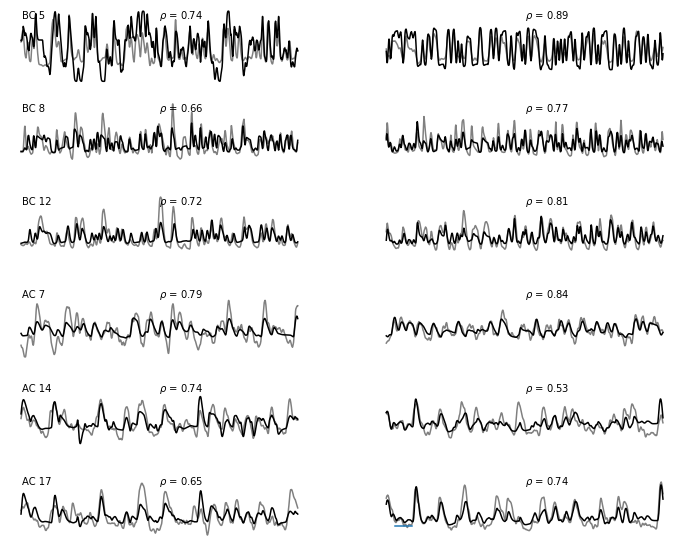

In [12]:
# Plot examples
lower = 500
upper = 1500

fig, ax = plt.subplots(6, 2, sharey= 'all', sharex='all', figsize=(12,10))

for index, value in enumerate(plot_bcs):
   
    my_ax = ax[index,0]
    my_ax.axis('off')
    my_ax.plot(bcs_response_uv[value,lower:upper], color = 'grey')
    my_ax.plot(y3_hat_bcs_norm[value,lower:upper], color = 'black')
    string = r'$\rho$' + ' = ' + str(np.around(corr_bcs[value,2], 2))
    my_ax.annotate(string, xy=(0.5, 0.85), xycoords='axes fraction', size = 10)
    my_ax.annotate('BC ' + str(value), xy=(0.05, 0.85), xycoords='axes fraction')
    
    my_ax = ax[index,1]
    my_ax.axis('off')
    my_ax.plot(bcs_response_green[value,lower:upper], color = 'grey')
    my_ax.plot(y4_hat_bcs_norm[value,lower:upper], color = 'black')
    string = r'$\rho$' + ' = ' + str(np.around(corr_bcs[value,3], 2))
    my_ax.annotate(string, xy=(0.5, 0.85), xycoords='axes fraction', size = 10)
    
for index, value in enumerate(plot_acs):
   
    my_ax = ax[index+3,0]
    my_ax.axis('off')
    my_ax.plot(acs_response_uv_1[value,lower:upper], color = 'grey')
    my_ax.plot(y5_hat_acs_norm[value,lower:upper], color = 'black')
    string = r'$\rho$' + ' = ' + str(np.around(corr_acs[value,2], 2))
    my_ax.annotate(string, xy=(0.5, 0.85), xycoords='axes fraction', size = 10)
    my_ax.annotate('AC ' + str(value), xy=(0.05, 0.85), xycoords='axes fraction')
    
    my_ax = ax[index+3,1]
    my_ax.axis('off')
    my_ax.plot(acs_response_green_1[value,lower:upper], color = 'grey')
    my_ax.plot(y6_hat_acs_norm[value,lower:upper], color = 'black')
    string = r'$\rho$' + ' = ' + str(np.around(corr_acs[value,3], 2))
    my_ax.annotate(string, xy=(0.5, 0.85), xycoords='axes fraction', size = 10)

my_ax.plot([0+30,64+30], [-0.25,-0.25])
#plt.savefig('Figures/model_19_response_examples.eps') 
plt.show()

Estimate SC

In [13]:
from utils_analysis import *

In [14]:
uv_kernels_bcs_hat = estimate_kernels_bcs(y3_hat_bcs, bcs_uv_flicker[:,0:3].T)
green_kernels_bcs_hat = estimate_kernels_bcs(y4_hat_bcs, bcs_green_flicker[:,3:].T)

uv_kernels_bcs = estimate_kernels_bcs(bcs_response_uv, bcs_uv_flicker[:,0:3].T)
green_kernels_bcs = estimate_kernels_bcs(bcs_response_green, bcs_green_flicker[:,3:].T)

stop = 96
start = 72
sc_bcs, sc_bcs_hat = estimate_sc(uv_kernels_bcs, uv_kernels_bcs_hat, 
                                 green_kernels_bcs, green_kernels_bcs_hat, start, stop)

In [15]:
uv_kernels_acs_hat = estimate_kernels_acs(y5_hat_acs, acs_uv_flicker_1[:,0:3].T, 
                                          y7_hat_acs, acs_uv_flicker_2[:,0:3].T)
green_kernels_acs_hat = estimate_kernels_acs(y6_hat_acs, acs_green_flicker_1[:,3:].T, 
                                             y8_hat_acs, acs_green_flicker_2[:,3:].T)

uv_kernels_acs = estimate_kernels_acs(acs_response_uv_1, acs_uv_flicker_1[:,0:3].T, 
                                      acs_response_uv_2, acs_uv_flicker_2[:,0:3].T)
green_kernels_acs = estimate_kernels_acs(acs_response_green_1, acs_green_flicker_1[:,3:].T, 
                                         acs_response_green_2, acs_green_flicker_2[:,3:].T)
stop = 96
start = 51
sc_acs, sc_acs_hat = estimate_sc(uv_kernels_acs, uv_kernels_acs_hat,
                                 green_kernels_acs, green_kernels_acs_hat, start, stop)

In [16]:
limit_acs = np.amax((np.amax(sc_acs), np.abs(np.amin(sc_acs))))
limit_bcs = np.amax((np.amax(sc_bcs), np.abs(np.amin(sc_bcs))))
limit_acs_hat = np.amax((np.amax(sc_acs_hat), np.abs(np.amin(sc_acs_hat))))
limit_bcs_hat = np.amax((np.amax(sc_bcs_hat), np.abs(np.amin(sc_bcs_hat))))

limit = np.amax((limit_acs, limit_bcs, limit_acs_hat, limit_bcs_hat))
print(limit)

0.8673981747305235


In [17]:
# Plotting function
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
PiYG = cm.get_cmap('PiYG', 256)
new_colors = PiYG(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 1])
vmax = limit
vmin = -limit
white_start = 1/4* limit
white_stop = -1/4* limit
total_range = vmax-vmin
len_color = new_colors.shape[0]
white_stop_percentage = np.abs(vmin-white_stop)*100/total_range
white_stop_pixel = int(white_stop_percentage*len_color*0.01)
white_start_percentage = np.abs(vmax-white_start)*100/total_range#*2
white_start_pixel = int(white_start_percentage*len_color*0.01)
new_colors[white_stop_pixel:-white_start_pixel,:] = white
newcmp = ListedColormap(new_colors)

def compare_colorCircles_wCMAP(color_pref, cmap, limit = None, colorbar = False, 
                               savefig = False, path = None):  
    nb_clusters = color_pref[0].shape[0]
    nb_conditions = color_pref[0].shape[1]
    nb_comparisons = len(color_pref)
    center = [0.5, 0.5]
    radii = [0.35, 0.2, 0.1][0:nb_conditions]
    if limit is None:
        limit = 0
        for c in range(nb_comparisons):
            limit = np.amax((limit, np.amax((np.amax(color_pref[c]), np.abs(np.amin(color_pref[c]))))))

    fig, ax = plt.subplots(nb_clusters, nb_comparisons, figsize=(1.5*nb_comparisons,nb_clusters*1.5))
    for c in range(nb_comparisons):
        for k in range(nb_clusters):
            patches = []
            colors = color_pref[c][k,:]
            for r in radii: # Largest circle is drawn first
                circle = Circle((center), r)
                patches.append(circle)   
            p = PatchCollection(patches, cmap = cmap, edgecolor = 'black', linewidth = 0.5)
            p.set_array(colors)
            p.set_clim([-limit, limit])
            ax[k,c].set_axis_off()
            ax[k,c].add_collection(p)
    if colorbar:
        fig.colorbar(p, ax=ax[-1,-1])
    if savefig:
        plt.savefig(path, dpi = 600, transparent=True, bbox_inches='tight')
    plt.show()

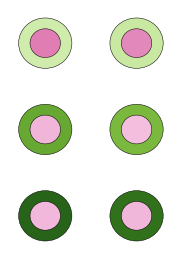

--


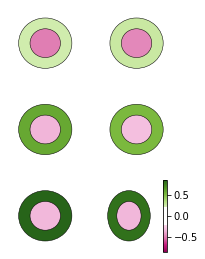

In [18]:
color_pref = [np.fliplr(sc_bcs[plot_bcs,0:2]), np.fliplr(sc_bcs_hat[plot_bcs,0:2])]
compare_colorCircles_wCMAP(color_pref, newcmp, limit = limit, colorbar = False, 
                           savefig = False, path = 'Figures/model_19_sc_bcs.eps')
print('--')
compare_colorCircles_wCMAP(color_pref, newcmp, limit = limit, colorbar = True, 
                           savefig = False, path = 'Figures/model_19_sc_bcs_colorbar.eps')

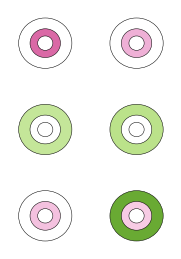

--


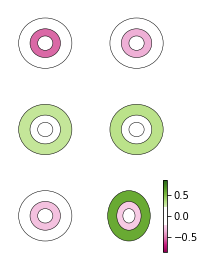

In [19]:
color_pref = [np.fliplr(sc_acs[plot_acs,:]), np.fliplr(sc_acs_hat[plot_acs,:])]
compare_colorCircles_wCMAP(color_pref, newcmp, limit = limit, colorbar = False, 
                           savefig = False, path = 'Figures/model_19_sc_acs.eps')
print('--')
compare_colorCircles_wCMAP(color_pref, newcmp, limit = limit, colorbar = True, 
                           savefig = False, path = 'Figures/model_19_sc_acs_colorbar.eps')

Predict without AC-AC inhibition

In [20]:
# Create model
model = FullBCModel(cell_types = types,
                    num_pr = 6,
                    steady_state_steps=10,
                    ip_steady=np.ones(13),
                    rrp_steady=np.ones(13),
                    num_acl=25)

model.load_state_dict(torch.load(path))
model.eval()

# Set AC-AC matrix to 0
for ac in np.arange(25):
    for ac_2 in np.arange(25):
        model.log_acl_acl_weight[ac,ac_2] = -np.inf

# Predict responses
y3_hat_bcs, internal_3, y3_hat_acs = model.forward(x3) # UV
y4_hat_bcs, internal_4, y4_hat_acs = model.forward(x4) # Green

y5_hat_bcs, internal_5, y5_hat_acs = model.forward(x5) # UV
y6_hat_bcs, internal_6, y6_hat_acs = model.forward(x6) # Green
y7_hat_bcs, internal_7, y7_hat_acs = model.forward(x7) # UV
y8_hat_bcs, internal_8, y8_hat_acs = model.forward(x8) # Green

y3_hat_bcs = y3_hat_bcs.detach().numpy()
y4_hat_bcs = y4_hat_bcs.detach().numpy()

y5_hat_acs = y5_hat_acs.detach().numpy()
y6_hat_acs = y6_hat_acs.detach().numpy()
y7_hat_acs = y7_hat_acs.detach().numpy()
y8_hat_acs = y8_hat_acs.detach().numpy()

# Estimate SC
uv_kernels_bcs_hat_X = estimate_kernels_bcs(y3_hat_bcs, bcs_uv_flicker[:,0:3].T)
green_kernels_bcs_hat_X = estimate_kernels_bcs(y4_hat_bcs, bcs_green_flicker[:,3:].T)

stop = 96
start = 72
_, sc_bcs_hat_X = estimate_sc(uv_kernels_bcs, uv_kernels_bcs_hat_X, 
                              green_kernels_bcs, green_kernels_bcs_hat_X, start, stop)


uv_kernels_acs_hat_X = estimate_kernels_acs(y5_hat_acs, acs_uv_flicker_1[:,0:3].T, 
                                            y7_hat_acs, acs_uv_flicker_2[:,0:3].T)
green_kernels_acs_hat_X = estimate_kernels_acs(y6_hat_acs, acs_green_flicker_1[:,3:].T,
                                               y8_hat_acs, acs_green_flicker_2[:,3:].T)

stop = 96
start = 51
_, sc_acs_hat_X = estimate_sc(uv_kernels_acs, uv_kernels_acs_hat_X,
                              green_kernels_acs, green_kernels_acs_hat_X, start, stop)

Predict without inhibition

In [21]:
# Create model
model = FullBCModel(cell_types = types,
                    num_pr = 6,
                    steady_state_steps=10,
                    ip_steady=np.ones(13),
                    rrp_steady=np.ones(13),
                    num_acl=25)

model.load_state_dict(torch.load(path))
model.eval()

# Set AC-AC matrix to 0
for ac in np.arange(25):
    for ac_2 in np.arange(25):
        model.log_acl_acl_weight[ac,ac_2] = -np.inf
        
# Set AC -> BC matrix to 0
for ac in np.arange(25):
    for bc in np.arange(13):        
        model.log_acl_bc_weight[bc,ac] = -np.inf
        
# Predict responses
y3_hat_bcs, internal_3, y3_hat_acs = model.forward(x3) # UV
y4_hat_bcs, internal_4, y4_hat_acs = model.forward(x4) # Green

y5_hat_bcs, internal_5, y5_hat_acs = model.forward(x5) # UV
y6_hat_bcs, internal_6, y6_hat_acs = model.forward(x6) # Green
y7_hat_bcs, internal_7, y7_hat_acs = model.forward(x7) # UV
y8_hat_bcs, internal_8, y8_hat_acs = model.forward(x8) # Green

y3_hat_bcs = y3_hat_bcs.detach().numpy()
y4_hat_bcs = y4_hat_bcs.detach().numpy()

y5_hat_acs = y5_hat_acs.detach().numpy()
y6_hat_acs = y6_hat_acs.detach().numpy()
y7_hat_acs = y7_hat_acs.detach().numpy()
y8_hat_acs = y8_hat_acs.detach().numpy()

# Estimate SC
uv_kernels_bcs_hat_noACs = estimate_kernels_bcs(y3_hat_bcs, bcs_uv_flicker[:,0:3].T)
green_kernels_bcs_hat_noACs = estimate_kernels_bcs(y4_hat_bcs, bcs_green_flicker[:,3:].T)

stop = 96
start = 72
_, sc_bcs_hat_noACs = estimate_sc(uv_kernels_bcs, uv_kernels_bcs_hat_noACs, 
                                  green_kernels_bcs, green_kernels_bcs_hat_noACs, start, stop)

uv_kernels_acs_hat_noACs = estimate_kernels_acs(y5_hat_acs, acs_uv_flicker_1[:,0:3].T, 
                                                y7_hat_acs, acs_uv_flicker_2[:,0:3].T)
green_kernels_acs_hat_noACs = estimate_kernels_acs(y6_hat_acs, acs_green_flicker_1[:,3:].T,
                                                   y8_hat_acs, acs_green_flicker_2[:,3:].T)

stop = 96
start = 51
_, sc_acs_hat_noACs = estimate_sc(uv_kernels_acs, uv_kernels_acs_hat_noACs,
                                  green_kernels_acs, green_kernels_acs_hat_noACs, start, stop)

Check sign of BCs

ON BCs


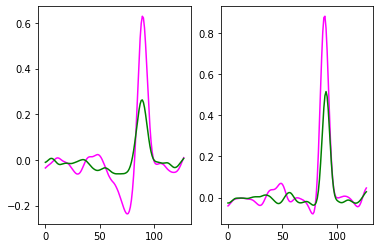

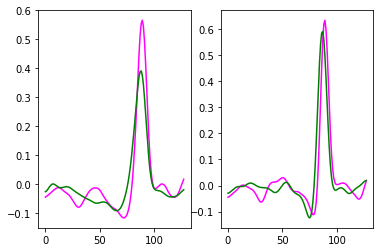

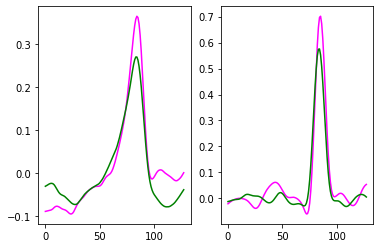

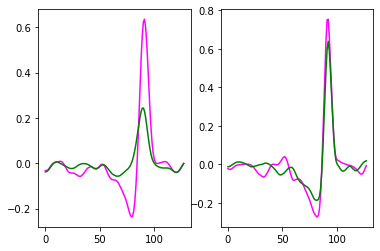

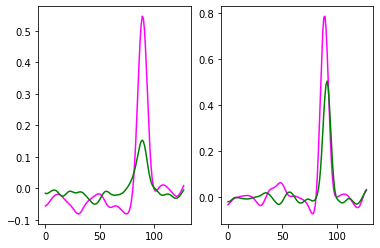

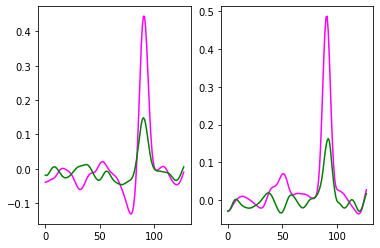

OFF BCs


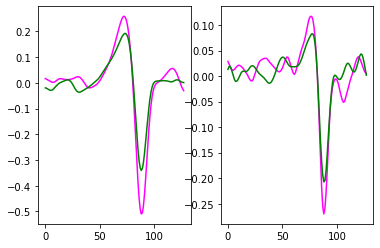

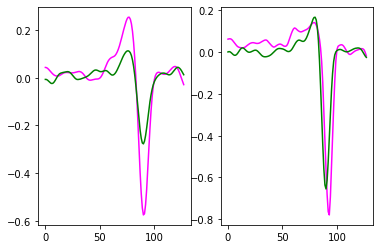

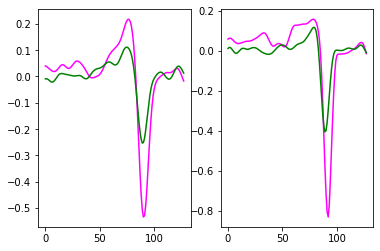

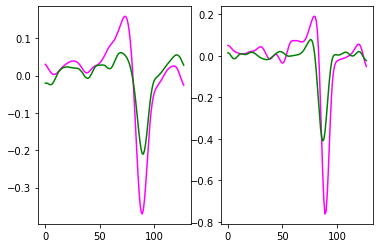

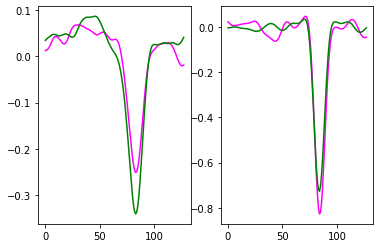

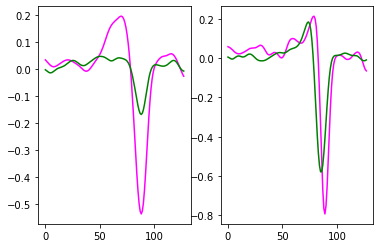

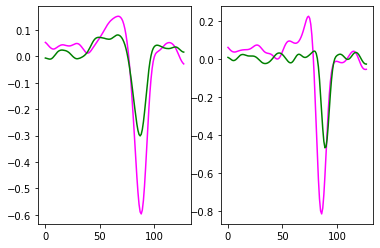

In [22]:
# Check sign
on_bcs = np.where(types[:,0] == 1)[0]
off_bcs = np.where(types[:,0] == -1)[0]

print('ON BCs')
for i in on_bcs:
    plt.subplot(1,2,1)
    plt.plot(uv_kernels_bcs[:,i,0], color = 'magenta')
    plt.plot(green_kernels_bcs[:,i,0], color = 'green')
    plt.subplot(1,2,2)
    plt.plot(uv_kernels_bcs_hat[:,i,0], color = 'magenta')
    plt.plot(green_kernels_bcs_hat[:,i,0], color = 'green')
    plt.show()
    
print('OFF BCs')
for i in off_bcs:
    plt.subplot(1,2,1)
    plt.plot(uv_kernels_bcs[:,i,0], color = 'magenta')
    plt.plot(green_kernels_bcs[:,i,0], color = 'green')
    plt.subplot(1,2,2)
    plt.plot(uv_kernels_bcs_hat[:,i,0], color = 'magenta')
    plt.plot(green_kernels_bcs_hat[:,i,0], color = 'green')
    plt.show()

Predict without OFF BCs

In [23]:
# Create model
model = FullBCModel(cell_types = types,
                    num_pr = 6,
                    steady_state_steps=10,
                    ip_steady=np.ones(13),
                    rrp_steady=np.ones(13),
                    num_acl=25)

model.load_state_dict(torch.load(path))
model.eval()

# Set PR -> BC matrix to 0
for bc in off_bcs:
    for pr in np.arange(6):
        model.log_pr_bc_weight[bc,pr] = -np.inf
        
# Set BC -> AC matrix to 0
for bc in off_bcs:
    for ac in np.arange(25):
        model.glycinergic_amacrine_cells.log_bc_ac_weight[ac,bc] = -np.inf
        
# Predict responses
y3_hat_bcs, internal_3, y3_hat_acs = model.forward(x3) # UV
y4_hat_bcs, internal_4, y4_hat_acs = model.forward(x4) # Green

y5_hat_bcs, internal_5, y5_hat_acs = model.forward(x5) # UV
y6_hat_bcs, internal_6, y6_hat_acs = model.forward(x6) # Green
y7_hat_bcs, internal_7, y7_hat_acs = model.forward(x7) # UV
y8_hat_bcs, internal_8, y8_hat_acs = model.forward(x8) # Green

y3_hat_bcs = y3_hat_bcs.detach().numpy()
y4_hat_bcs = y4_hat_bcs.detach().numpy()

y5_hat_acs = y5_hat_acs.detach().numpy()
y6_hat_acs = y6_hat_acs.detach().numpy()
y7_hat_acs = y7_hat_acs.detach().numpy()
y8_hat_acs = y8_hat_acs.detach().numpy()

# Estimate SC
uv_kernels_bcs_hat_noOFF = estimate_kernels_bcs(y3_hat_bcs, bcs_uv_flicker[:,0:3].T)
green_kernels_bcs_hat_noOFF = estimate_kernels_bcs(y4_hat_bcs, bcs_green_flicker[:,3:].T)

stop = 96
start = 72
_, sc_bcs_hat_noOFF = estimate_sc(uv_kernels_bcs, uv_kernels_bcs_hat_noOFF, 
                                  green_kernels_bcs, green_kernels_bcs_hat_noOFF, start, stop)


uv_kernels_acs_hat_noOFF = estimate_kernels_acs(y5_hat_acs, acs_uv_flicker_1[:,0:3].T, 
                                                y7_hat_acs, acs_uv_flicker_2[:,0:3].T)
green_kernels_acs_hat_noOFF = estimate_kernels_acs(y6_hat_acs, acs_green_flicker_1[:,3:].T,
                                                   y8_hat_acs, acs_green_flicker_2[:,3:].T)

stop = 96
start = 51
_, sc_acs_hat_noOFF = estimate_sc(uv_kernels_acs, uv_kernels_acs_hat_noOFF,
                                  green_kernels_acs, green_kernels_acs_hat_noOFF, start, stop)

Predict without ON BCs

In [24]:
# Create model
model = FullBCModel(cell_types = types,
                    num_pr = 6,
                    steady_state_steps=10,
                    ip_steady=np.ones(13),
                    rrp_steady=np.ones(13),
                    num_acl=25)

model.load_state_dict(torch.load(path))
model.eval()

# Set PR -> BC matrix to 0
for bc in on_bcs:
    for pr in np.arange(6):
        model.log_pr_bc_weight[bc,pr] = -np.inf
        
# Set BC -> AC matrix to 0
for bc in on_bcs:
    for ac in np.arange(25):
        model.glycinergic_amacrine_cells.log_bc_ac_weight[ac,bc] = -np.inf
        
# Predict responses
y3_hat_bcs, internal_3, y3_hat_acs = model.forward(x3) # UV
y4_hat_bcs, internal_4, y4_hat_acs = model.forward(x4) # Green

y5_hat_bcs, internal_5, y5_hat_acs = model.forward(x5) # UV
y6_hat_bcs, internal_6, y6_hat_acs = model.forward(x6) # Green
y7_hat_bcs, internal_7, y7_hat_acs = model.forward(x7) # UV
y8_hat_bcs, internal_8, y8_hat_acs = model.forward(x8) # Green

y3_hat_bcs = y3_hat_bcs.detach().numpy()
y4_hat_bcs = y4_hat_bcs.detach().numpy()

y5_hat_acs = y5_hat_acs.detach().numpy()
y6_hat_acs = y6_hat_acs.detach().numpy()
y7_hat_acs = y7_hat_acs.detach().numpy()
y8_hat_acs = y8_hat_acs.detach().numpy()

# Estimate SC
uv_kernels_bcs_hat_noON = estimate_kernels_bcs(y3_hat_bcs, bcs_uv_flicker[:,0:3].T)
green_kernels_bcs_hat_noON = estimate_kernels_bcs(y4_hat_bcs, bcs_green_flicker[:,3:].T)

stop = 96
start = 72
_, sc_bcs_hat_noON = estimate_sc(uv_kernels_bcs, uv_kernels_bcs_hat_noON, 
                                 green_kernels_bcs, green_kernels_bcs_hat_noON, start, stop)


uv_kernels_acs_hat_noON = estimate_kernels_acs(y5_hat_acs, acs_uv_flicker_1[:,0:3].T, 
                                               y7_hat_acs, acs_uv_flicker_2[:,0:3].T)
green_kernels_acs_hat_noON = estimate_kernels_acs(y6_hat_acs, acs_green_flicker_1[:,3:].T,
                                                  y8_hat_acs, acs_green_flicker_2[:,3:].T)

stop = 96
start = 51
_, sc_acs_hat_noON = estimate_sc(uv_kernels_acs, uv_kernels_acs_hat_noON,
                                 green_kernels_acs, green_kernels_acs_hat_noON, start, stop)

Create df for plotting

In [25]:
# ACs
columns = ['Cluster', 'Model', 'Condition', 'SC']
df = pd.DataFrame(columns = columns)
conditions = ['Center', 'Ring', 'Surround']

for i in range(3):

    current_data = {'Cluster': list(np.arange(25)),
                    'Model': list(np.repeat('No AC-AC Inhibition', 25)),
                    'Condition': list(np.repeat(conditions[i], 25)),
                    'SC': list(sc_acs_hat_X[:,i]-sc_acs_hat[:,i])}
    df = pd.concat([df, pd.DataFrame(current_data, columns=columns)], ignore_index=True)
    
for i in range(3):

    current_data = {'Cluster': list(np.arange(25)),
                    'Model': list(np.repeat('No Inhibition', 25)),
                    'Condition': list(np.repeat(conditions[i], 25)),
                    'SC': list(sc_acs_hat_noACs[:,i]-sc_acs_hat[:,i])}
    df = pd.concat([df, pd.DataFrame(current_data, columns=columns)], ignore_index=True)
    
for i in range(3):

    current_data = {'Cluster': list(np.arange(25)),
                    'Model': list(np.repeat('No ON BCs', 25)),
                    'Condition': list(np.repeat(conditions[i], 25)),
                    'SC': list(sc_acs_hat_noON[:,i]-sc_acs_hat[:,i])}
    df = pd.concat([df, pd.DataFrame(current_data, columns=columns)], ignore_index=True)
    
for i in range(3):

    current_data = {'Cluster': list(np.arange(25)),
                    'Model': list(np.repeat('No OFF BCs', 25)),
                    'Condition': list(np.repeat(conditions[i], 25)),
                    'SC': list(sc_acs_hat_noOFF[:,i]-sc_acs_hat[:,i])}
    df = pd.concat([df, pd.DataFrame(current_data, columns=columns)], ignore_index=True)

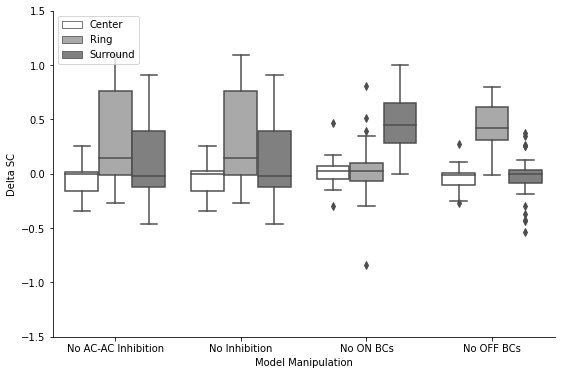

In [26]:
import seaborn as sns

plt.figure(figsize=(9,6))
sns.boxplot(data=df, x="Model", y="SC", hue="Condition",
            palette=['white', 'darkgray', 'gray'])

plt.ylim([-1.5,1.5])
plt.legend(loc=2, prop={'size': 10})
sns.despine()
plt.ylabel('Delta SC')
plt.xlabel('Model Manipulation')
#plt.savefig('Figures/model_19_manipulation_acs.eps')
plt.show()

In [27]:
# BCs
columns = ['Cluster', 'Model', 'Condition', 'SC']
df_bcs = pd.DataFrame(columns = columns)
conditions = ['Center', 'Surround']

for i in range(2):

    current_data = {'Cluster': list(np.arange(13)),
                    'Model': list(np.repeat('No AC-AC Inhibition', 13)),
                    'Condition': list(np.repeat(conditions[i], 13)),
                    'SC': list(sc_bcs_hat_X[:,i]-sc_bcs_hat[:,i])}
    df_bcs = pd.concat([df_bcs, pd.DataFrame(current_data, columns=columns)], ignore_index=True)
    
for i in range(2):

    current_data = {'Cluster': list(np.arange(13)),
                    'Model': list(np.repeat('No Inhibition', 13)),
                    'Condition': list(np.repeat(conditions[i], 13)),
                    'SC': list(sc_bcs_hat_noACs[:,i]-sc_bcs_hat[:,i])}
    df_bcs = pd.concat([df_bcs, pd.DataFrame(current_data, columns=columns)], ignore_index=True)
    
for i in range(2):

    current_data = {'Cluster': list(np.arange(len(off_bcs))),
                    'Model': list(np.repeat('No ON BCs', len(off_bcs))),
                    'Condition': list(np.repeat(conditions[i], len(off_bcs))),
                    'SC': list(sc_bcs_hat_noON[off_bcs,i]-sc_bcs_hat[off_bcs,i])}
    df_bcs = pd.concat([df_bcs, pd.DataFrame(current_data, columns=columns)], ignore_index=True)
    
for i in range(2):

    current_data = {'Cluster': list(np.arange(len(on_bcs))),
                    'Model': list(np.repeat('No OFF BCs', len(on_bcs))),
                    'Condition': list(np.repeat(conditions[i], len(on_bcs))),
                    'SC': list(sc_bcs_hat_noOFF[on_bcs,i]-sc_bcs_hat[on_bcs,i])}
    df_bcs = pd.concat([df_bcs, pd.DataFrame(current_data, columns=columns)], ignore_index=True)

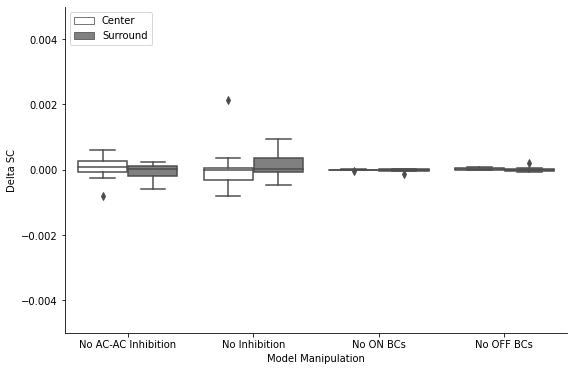

In [28]:
import seaborn as sns

plt.figure(figsize=(9,6))
sns.boxplot(data=df_bcs, x="Model", y="SC", hue="Condition",
            palette=['white', 'gray'])

plt.ylim([-0.005,0.005])
plt.legend(loc=2, prop={'size': 10})
sns.despine()
plt.ylabel('Delta SC')
plt.xlabel('Model Manipulation')
#plt.savefig('Figures/model_manipulation_bcs.eps')
plt.show()

In [29]:
all_acs = np.concatenate((sc_acs, sc_acs_hat, sc_acs_hat_noACs, 
                          sc_acs_hat_noON, sc_acs_hat_noOFF), axis = 1)

limit = np.amax((np.amax(all_acs), np.abs(np.amin(all_acs))))
print(limit)

0.8728996999945043


In [30]:
# Plotting function
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
PiYG = cm.get_cmap('PiYG', 256)
new_colors = PiYG(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 1])
vmax = limit
vmin = -limit
white_start = 1/4* limit
white_stop = -1/4* limit
total_range = vmax-vmin
len_color = new_colors.shape[0]
white_stop_percentage = np.abs(vmin-white_stop)*100/total_range
white_stop_pixel = int(white_stop_percentage*len_color*0.01)
white_start_percentage = np.abs(vmax-white_start)*100/total_range#*2
white_start_pixel = int(white_start_percentage*len_color*0.01)
new_colors[white_stop_pixel:-white_start_pixel,:] = white
newcmp = ListedColormap(new_colors)

def compare_colorCircles_wCMAP(color_pref, cmap, limit = None, colorbar = False, 
                               savefig = False, path = None):  
    nb_clusters = color_pref[0].shape[0]
    nb_conditions = color_pref[0].shape[1]
    nb_comparisons = len(color_pref)
    center = [0.5, 0.5]
    radii = [0.35, 0.2, 0.1][0:nb_conditions]
    if limit is None:
        limit = 0
        for c in range(nb_comparisons):
            limit = np.amax((limit, np.amax((np.amax(color_pref[c]), np.abs(np.amin(color_pref[c]))))))

    fig, ax = plt.subplots(nb_clusters, nb_comparisons, figsize=(1.5*nb_comparisons,nb_clusters*1.5))
    for c in range(nb_comparisons):
        for k in range(nb_clusters):
            patches = []
            colors = color_pref[c][k,:]
            for r in radii: # Largest circle is drawn first
                circle = Circle((center), r)
                patches.append(circle)   
            p = PatchCollection(patches, cmap = cmap, edgecolor = 'black', linewidth = 0.5)
            p.set_array(colors)
            p.set_clim([-limit, limit])
            ax[k,c].set_axis_off()
            ax[k,c].add_collection(p)
    if colorbar:
        fig.colorbar(p, ax=ax[-1,-1])
    if savefig:
        plt.savefig(path, dpi = 600, transparent=True, bbox_inches='tight')
    plt.show()

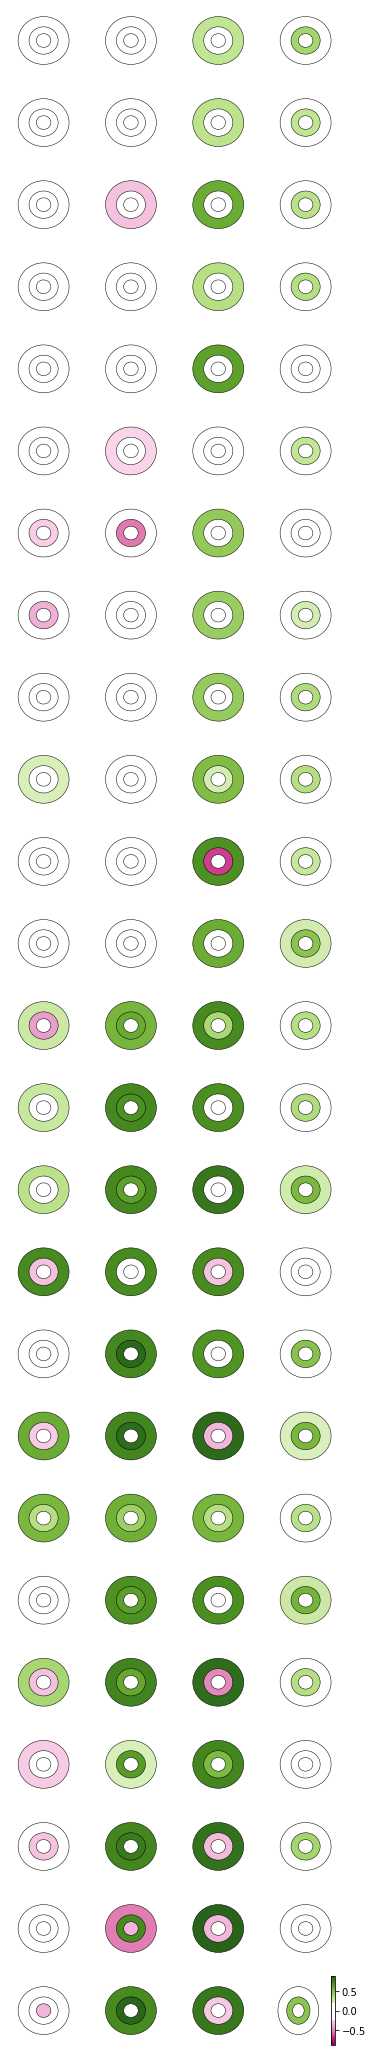

In [31]:
color_pref = [np.fliplr(sc_acs_hat), 
              np.fliplr(sc_acs_hat_noACs),
              np.fliplr(sc_acs_hat_noON),  
              np.fliplr(sc_acs_hat_noOFF)]
compare_colorCircles_wCMAP(color_pref, newcmp, limit = limit, colorbar = True, 
                           savefig = False, path = 'Figures/model_19_sc_acs_colorbar_allClusters.eps')

OOI

In [32]:
def calculate_ooi(uv_kernels, green_kernels):
    
    frequency = 64
    a=np.zeros(frequency) # 1 second off
    b=np.ones(frequency) # 1 second on
    c=np.zeros(frequency) # 1 second off
    stimulus= np.concatenate((a,b,c))

    line_duration_s = 1/64
    kernel_length_line = np.int(np.floor(2/line_duration_s))
    offset_after = np.int(np.floor(kernel_length_line*.25)) #lines to include into the future
    offset_before = kernel_length_line-offset_after
    kernel_past = offset_before - 1
    kernel_future = offset_after

    window_on_start = 64
    window_on_end = 64*2
    window_off_start = 64*2
    window_off_end = 64*3        

    nb_clusters = uv_kernels.shape[1]
    nb_conditions =  uv_kernels.shape[2]
    responses = np.zeros((stimulus.shape[0],nb_clusters,nb_conditions))
    ooi = np.zeros((nb_clusters,nb_conditions))

    for i in np.arange(nb_clusters):
        for j in np.arange(nb_conditions):

            response_uv = np.convolve(stimulus, np.flip(uv_kernels[:,i,j]), 
                                      mode='full')[kernel_future:-kernel_past]
            response_green = np.convolve(stimulus, np.flip(green_kernels[:,i,j]), 
                                         mode='full')[kernel_future:-kernel_past]
            response_avrg = (response_uv + response_green)/2
            responses[:,i,j] = response_avrg - response_avrg.min()

            on_part = responses[window_on_start:window_on_end,i,j].mean()
            off_part = responses[window_off_start:window_off_end,i,j].mean()
            ooi[i,j] = (on_part - off_part)/(on_part + off_part)

    return ooi

In [33]:
ooi_acs = calculate_ooi(uv_kernels_acs, green_kernels_acs)
ooi_acs_hat = calculate_ooi(uv_kernels_acs_hat, green_kernels_acs_hat)
ooi_acs_hat_X = calculate_ooi(uv_kernels_acs_hat_X, green_kernels_acs_hat_X)
ooi_acs_hat_noACs = calculate_ooi(uv_kernels_acs_hat_noACs, green_kernels_acs_hat_noACs)
ooi_acs_hat_noON = calculate_ooi(uv_kernels_acs_hat_noON, green_kernels_acs_hat_noON)
ooi_acs_hat_noOFF = calculate_ooi(uv_kernels_acs_hat_noOFF, green_kernels_acs_hat_noOFF)

In [34]:
# ACs
columns = ['Cluster', 'Model', 'Condition', 'OOI']
df = pd.DataFrame(columns = columns)
conditions = ['Center', 'Ring', 'Surround']

for i in range(3):

    current_data = {'Cluster': list(np.arange(25)),
                    'Model': list(np.repeat('No AC-AC Inhibition', 25)),
                    'Condition': list(np.repeat(conditions[i], 25)),
                    'OOI': list(ooi_acs_hat_X[:,i]-ooi_acs_hat[:,i])}
    df = pd.concat([df, pd.DataFrame(current_data, columns=columns)], ignore_index=True)
    
for i in range(3):

    current_data = {'Cluster': list(np.arange(25)),
                    'Model': list(np.repeat('No Inhibition', 25)),
                    'Condition': list(np.repeat(conditions[i], 25)),
                    'OOI': list(ooi_acs_hat_noACs[:,i]-ooi_acs_hat[:,i])}
    df = pd.concat([df, pd.DataFrame(current_data, columns=columns)], ignore_index=True)
    
for i in range(3):

    current_data = {'Cluster': list(np.arange(25)),
                    'Model': list(np.repeat('No ON BCs', 25)),
                    'Condition': list(np.repeat(conditions[i], 25)),
                    'OOI': list(ooi_acs_hat_noON[:,i]-ooi_acs_hat[:,i])}
    df = pd.concat([df, pd.DataFrame(current_data, columns=columns)], ignore_index=True)
    
for i in range(3):

    current_data = {'Cluster': list(np.arange(25)),
                    'Model': list(np.repeat('No OFF BCs', 25)),
                    'Condition': list(np.repeat(conditions[i], 25)),
                    'OOI': list(ooi_acs_hat_noOFF[:,i]-ooi_acs_hat[:,i])}
    df = pd.concat([df, pd.DataFrame(current_data, columns=columns)], ignore_index=True)

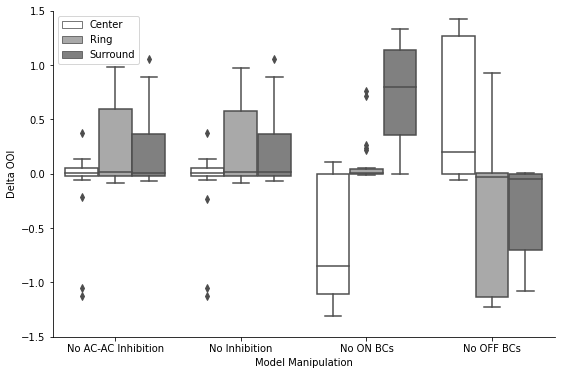

In [35]:
import seaborn as sns

plt.figure(figsize=(9,6))
sns.boxplot(data=df, x="Model", y="OOI", hue="Condition",
            palette=['white', 'darkgray', 'gray'])

plt.ylim([-1.5,1.5])
plt.legend(loc=2, prop={'size': 10})
sns.despine()
plt.ylabel('Delta OOI')
plt.xlabel('Model Manipulation')
#plt.savefig('Figures/model_19_manipulation_acs_OOI.eps')

plt.show()

In [36]:
from utils_analysis import *

In [37]:
def compare_kernels_acs_scalebar(uv_kernels, uv_kernels_hat, 
                                 green_kernels, green_kernels_hat, savefig = False, path = None):
    nb_clusters = uv_kernels.shape[1]
    labels = ['UV-c', 'UV-r', 'UV-s', 'G-c', 'G-r', 'G-s']
    colors = ['purple', 'hotpink', 'magenta', 'darkgreen', 'limegreen', 'lime']
    size_kernel = uv_kernels.shape[0]
    time = np.linspace(-1.5,0.5,size_kernel)
    
    fig, ax = plt.subplots(nb_clusters, 6, sharex='all', sharey='row', figsize=(10,16))
    # Plot kernels based on cluster average
    for current_cluster_ID in range(nb_clusters):
        for current_kernel_ID in range(3):
            my_ax = ax[current_cluster_ID, current_kernel_ID]
            my_ax.axis('off')
            if current_kernel_ID == 0:
                my_ax.plot([-1.5,-1.5],[0,0.3])
                my_ax.plot([0,0.5], [-0.3,-0.3])
            my_ax.plot(time, uv_kernels[:,current_cluster_ID, current_kernel_ID],
                       color = 'black', linewidth = 1.5)
            my_ax = ax[current_cluster_ID, current_kernel_ID+3]
            my_ax.axis('off')
            my_ax.plot(time, green_kernels[:,current_cluster_ID, current_kernel_ID],
                       color = 'black', linewidth = 1.5)    

    # Plot kernels based on cluster average predictions
    for current_cluster_ID in range(nb_clusters):
        for current_kernel_ID in range(3):
            my_ax = ax[current_cluster_ID, current_kernel_ID]
            my_ax.axis('off') 
            my_ax.axhline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75)
            my_ax.axvline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75) # Response
            my_ax.plot(time, uv_kernels_hat[:,current_cluster_ID, current_kernel_ID],
                       color = colors[current_kernel_ID], linewidth = 1.5)
            if current_cluster_ID == 0:
                my_ax.set_title(labels[current_kernel_ID])
            my_ax = ax[current_cluster_ID, current_kernel_ID+3]
            my_ax.axis('off')
            my_ax.axhline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75)
            my_ax.axvline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75) # Response
            my_ax.plot(time, green_kernels_hat[:,current_cluster_ID, current_kernel_ID],
                       color = colors[current_kernel_ID+3], linewidth = 1.5)
            if current_cluster_ID == 0:
                my_ax.set_title(labels[current_kernel_ID+3])
    if savefig:
        plt.savefig(path, dpi = 600, transparent=True, bbox_inches='tight')
    plt.show()

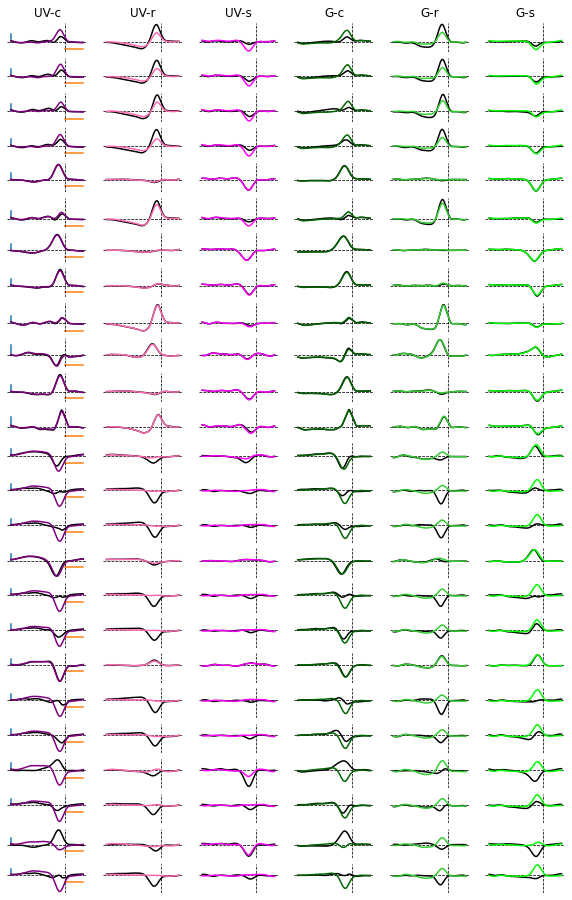

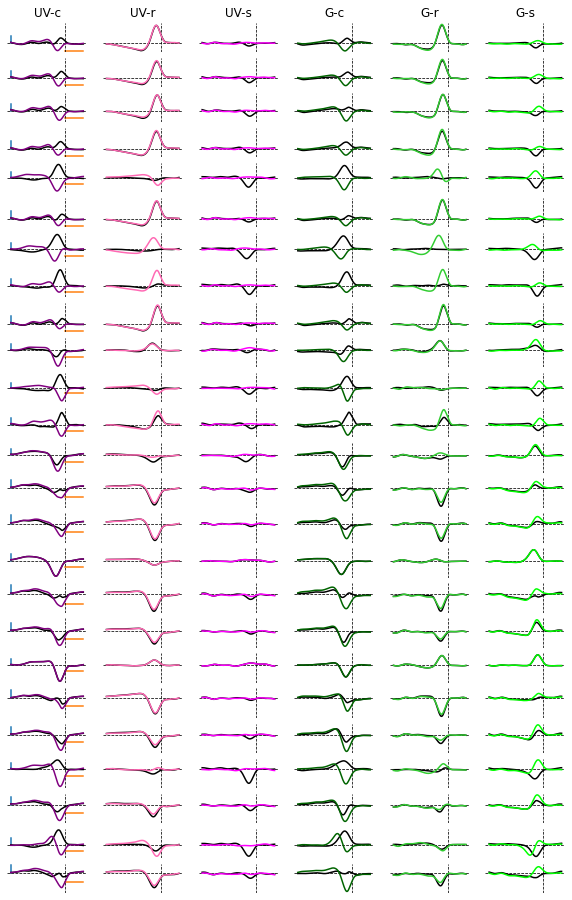

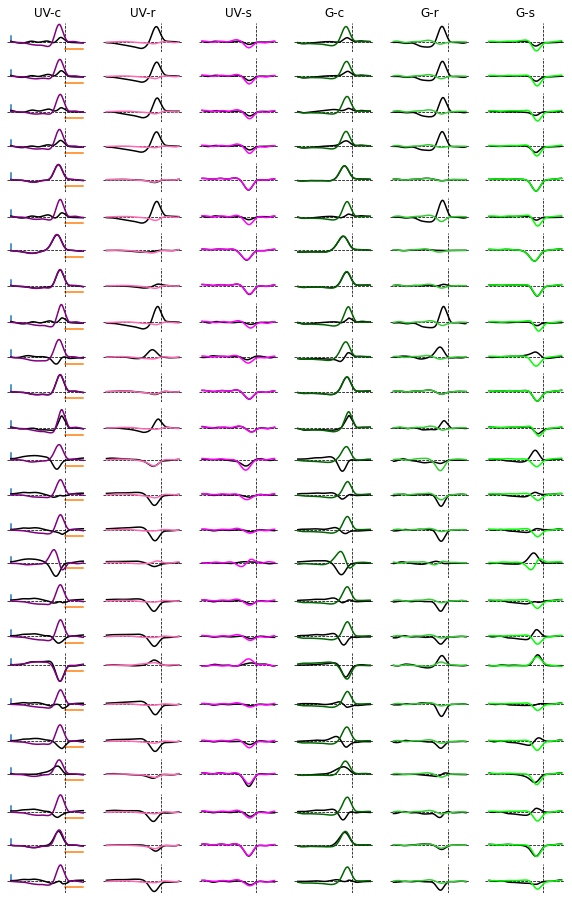

In [38]:
compare_kernels_acs_scalebar(uv_kernels_acs_hat, uv_kernels_acs_hat_noACs, 
                             green_kernels_acs_hat, green_kernels_acs_hat_noACs,
                             False, 'Figures/model_19_kernels_noInhibtion_scalebar.eps')

compare_kernels_acs_scalebar(uv_kernels_acs_hat, uv_kernels_acs_hat_noON,
                             green_kernels_acs_hat, green_kernels_acs_hat_noON, 
                             False, 'Figures/model_19_kernels_noON_scalebar.eps')

compare_kernels_acs_scalebar(uv_kernels_acs_hat, uv_kernels_acs_hat_noOFF, 
                             green_kernels_acs_hat, green_kernels_acs_hat_noOFF, 
                             False, 'Figures/model_19_kernels_noOFF_scalebar.eps')

Lineplot with all clusters

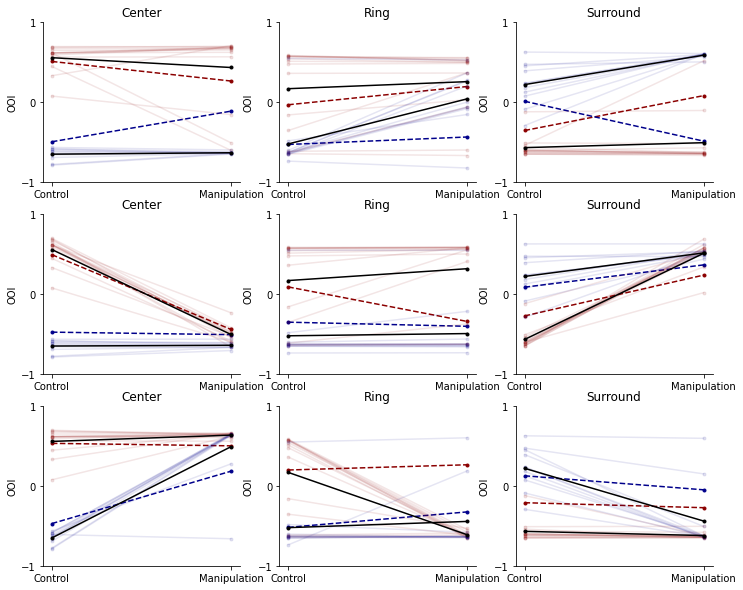

In [39]:
labels = ['Center', 'Ring', 'Surround']
colors = ['darkblue', 'darkred']
drugs = ['tpmpa.npy', 'lap4.npy', 'ubp310.npy']
model_arrays = [ooi_acs_hat_noACs, ooi_acs_hat_noON, ooi_acs_hat_noOFF]
sign_model = (ooi_acs_hat[:,0] > 0)*1
on_model = np.where(sign_model == 1)[0]
off_model = np.where(sign_model == 0)[0]

plt.figure(figsize=(12,10))

for index, value in enumerate(drugs):
    
    ooi_control = np.load('Marili Averages Ventral Data/OOi_ctrl_' + value)
    ooi_drug = np.load('Marili Averages Ventral Data/OOi_drug_' + value)
    sc_control = np.load('Marili Averages Ventral Data/SC_ctrl_' + value)
    sc_drug  = np.load('Marili Averages Ventral Data/SC_drug_' + value)
    
    on_rois = np.where(ooi_control[:,0] > 0)[0]
    off_rois = np.where(ooi_control[:,0] < 0)[0]
    
    ooi_on_control = np.mean(ooi_control[on_rois,:], axis = 0)
    ooi_off_control = np.mean(ooi_control[off_rois,:], axis = 0)
    ooi_on_drug = np.mean(ooi_drug[on_rois,:], axis = 0)
    ooi_off_drug = np.mean(ooi_drug[off_rois,:], axis = 0)
    
    sc_on_control = np.mean(sc_control[on_rois,:], axis = 0)
    sc_off_control = np.mean(sc_control[off_rois,:], axis = 0)
    sc_on_drug = np.mean(sc_drug[on_rois,:], axis = 0)
    sc_off_drug = np.mean(sc_drug[off_rois,:], axis = 0)
    
    for i in range(3):
        
        ax = plt.subplot(3,3,(index*3)+(i+1))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.plot([0,1], [ooi_on_control[i], ooi_on_drug[i]], '.--', color = 'darkred')
        plt.plot([0,1], [ooi_off_control[i], ooi_off_drug[i]], '.--', color = 'darkblue')
        
        for j in np.arange(25):
            plt.plot([0,1], [ooi_acs_hat[j,i], model_arrays[index][j,i]], 
                     '.-', color = colors[sign_model[j]], alpha = 0.1)
        
        plt.plot([0,1], [np.mean(ooi_acs_hat[on_model,i]), np.mean(model_arrays[index][on_model,i])],
                 '.-', color = 'black')
        
        plt.plot([0,1], [np.mean(ooi_acs_hat[off_model,i]), np.mean(model_arrays[index][off_model,i])],
                 '.-', color = 'black')

        plt.ylim([-1,1])
        plt.xticks([0,1], ['Control', 'Manipulation'])
        plt.title(labels[i])
        plt.ylabel('OOI')
        plt.yticks([-1,0,1])

#plt.savefig('Figures/model_19_ooi.eps')
plt.show()

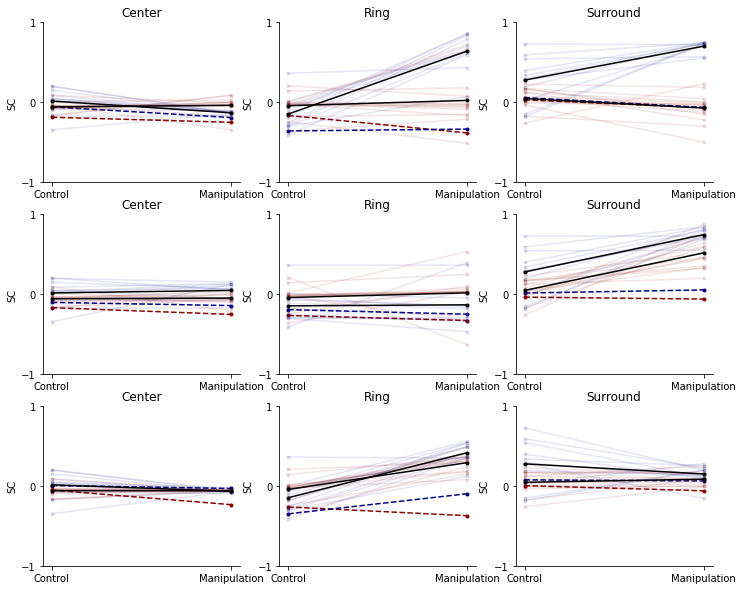

In [40]:
drugs = ['tpmpa.npy', 'lap4.npy', 'ubp310.npy']
model_arrays = [sc_acs_hat_noACs, sc_acs_hat_noON, sc_acs_hat_noOFF]
sign_model = (ooi_acs_hat[:,0] > 0)*1
on_model = np.where(sign_model == 1)[0]
off_model = np.where(sign_model == 0)[0]

plt.figure(figsize=(12,10))

for index, value in enumerate(drugs):
    
    ooi_control = np.load('Marili Averages Ventral Data/OOi_ctrl_' + value)
    ooi_drug = np.load('Marili Averages Ventral Data/OOi_drug_' + value)
    sc_control = np.load('Marili Averages Ventral Data/SC_ctrl_' + value)
    sc_drug  = np.load('Marili Averages Ventral Data/SC_drug_' + value)
    
    on_rois = np.where(ooi_control[:,0] > 0)[0]
    off_rois = np.where(ooi_control[:,0] < 0)[0]
    
    ooi_on_control = np.mean(ooi_control[on_rois,:], axis = 0)
    ooi_off_control = np.mean(ooi_control[off_rois,:], axis = 0)
    ooi_on_drug = np.mean(ooi_drug[on_rois,:], axis = 0)
    ooi_off_drug = np.mean(ooi_drug[off_rois,:], axis = 0)
    
    sc_on_control = np.mean(sc_control[on_rois,:], axis = 0)
    sc_off_control = np.mean(sc_control[off_rois,:], axis = 0)
    sc_on_drug = np.mean(sc_drug[on_rois,:], axis = 0)
    sc_off_drug = np.mean(sc_drug[off_rois,:], axis = 0)
    
    for i in range(3):
        
        ax = plt.subplot(3,3,(index*3)+(i+1))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.plot([0,1], [sc_on_control[i], sc_on_drug[i]], '.--', color = 'darkred')
        plt.plot([0,1], [sc_off_control[i], sc_off_drug[i]], '.--', color = 'darkblue')
        
        for j in np.arange(25):
            plt.plot([0,1], [sc_acs_hat[j,i], model_arrays[index][j,i]], 
                     '.-', color = colors[sign_model[j]], alpha = 0.1)
        
        plt.plot([0,1], [np.mean(sc_acs_hat[on_model,i]), np.mean(model_arrays[index][on_model,i])],
                 '.-', color = 'black')
        
        plt.plot([0,1], [np.mean(sc_acs_hat[off_model,i]), np.mean(model_arrays[index][off_model,i])],
                 '.-', color = 'black')

        plt.ylim([-1,1])
        plt.xticks([0,1], ['Control', 'Manipulation'])
        plt.title(labels[i])
        plt.ylabel('SC')
        plt.yticks([-1,0,1])

#plt.savefig('Figures/model_19_sc.eps')
plt.show()

Statistics

In [41]:
import scipy.stats as stats
import statsmodels.stats.multitest

In [42]:
p_vals = []

# OOI
for i in range(3):
    
    # No GABA
    p_vals.append(stats.ttest_rel(ooi_acs_hat[on_model,i], ooi_acs_hat_noACs[on_model,i]).pvalue)
    p_vals.append(stats.ttest_rel(ooi_acs_hat[off_model,i], ooi_acs_hat_noACs[off_model,i]).pvalue)
    
    # No ON
    p_vals.append(stats.ttest_rel(ooi_acs_hat[on_model,i], ooi_acs_hat_noON[on_model,i]).pvalue)
    p_vals.append(stats.ttest_rel(ooi_acs_hat[off_model,i], ooi_acs_hat_noON[off_model,i]).pvalue)
    
    # No OFF
    p_vals.append(stats.ttest_rel(ooi_acs_hat[on_model,i], ooi_acs_hat_noOFF[on_model,i]).pvalue)
    p_vals.append(stats.ttest_rel(ooi_acs_hat[off_model,i], ooi_acs_hat_noOFF[off_model,i]).pvalue)

# SC
for i in range(3):

    # No GABA
    p_vals.append(stats.ttest_rel(sc_acs_hat[on_model,i], sc_acs_hat_noACs[on_model,i]).pvalue)
    p_vals.append(stats.ttest_rel(sc_acs_hat[off_model,i], sc_acs_hat_noACs[off_model,i]).pvalue)
    
    # No ON
    p_vals.append(stats.ttest_rel(sc_acs_hat[on_model,i], sc_acs_hat_noON[on_model,i]).pvalue)
    p_vals.append(stats.ttest_rel(sc_acs_hat[off_model,i], sc_acs_hat_noON[off_model,i]).pvalue)
    
    # No OFF
    p_vals.append(stats.ttest_rel(sc_acs_hat[on_model,i], sc_acs_hat_noOFF[on_model,i]).pvalue)
    p_vals.append(stats.ttest_rel(sc_acs_hat[off_model,i], sc_acs_hat_noOFF[off_model,i]).pvalue)
    
assert len(p_vals) == 36

In [43]:
drug = ['NO GABA;', 'NO ON BCs;', 'NO OFF BCs;']
polarity = ['ON Cells', 'OFF Cells']
space = ['Centre', 'Ring', 'Surround']
order_tests = []

# OOI
for space_i in space:
    for drug_i in drug:
        for polarity_i in polarity:
            order_tests.append('OOI: ' + space_i + ' ' + drug_i + ' ' + polarity_i)
            
# SC
for space_i in space:
    for drug_i in drug:
        for polarity_i in polarity:
            order_tests.append('SC: ' + space_i + ' ' + drug_i + ' ' + polarity_i)

In [44]:
reject, p_corr, _, alpha_corr = statsmodels.stats.multitest.multipletests(p_vals, alpha = 0.05,
                                                                          method = 'bonferroni')

In [45]:
print(p_corr)
print(np.where(reject)[0])

[1.00000000e+00 1.00000000e+00 1.78746948e-10 1.00000000e+00
 1.00000000e+00 1.63068196e-04 1.00000000e+00 1.46508949e-02
 1.00000000e+00 1.00000000e+00 3.32006856e-03 1.00000000e+00
 1.00000000e+00 4.66184943e-02 3.54681089e-09 8.71890359e-02
 1.00000000e+00 1.38007459e-03 1.00000000e+00 4.37167567e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 4.08643846e-04 1.00000000e+00 1.00000000e+00
 1.88757887e-04 3.19542546e-04 1.00000000e+00 4.19661048e-02
 1.28408886e-03 1.90881251e-02 1.00000000e+00 1.00000000e+00]
[ 2  5  7 10 13 14 17 25 28 29 31 32 33]


In [46]:
print('BCs')
for i in range(2):
    print(np.around(stats.pearsonr(sc_bcs[:,i], sc_bcs_hat[:,i])[0],2))
    
print('ACs')
for i in range(3):
    print(np.around(stats.pearsonr(sc_acs[:,i], sc_acs_hat[:,i])[0],2))

BCs
0.42
0.72
ACs
0.7
0.31
0.51


In [47]:
np.array(order_tests)[np.where(reject)[0]]

array(['OOI: Centre NO ON BCs; ON Cells',
       'OOI: Centre NO OFF BCs; OFF Cells',
       'OOI: Ring NO GABA; OFF Cells', 'OOI: Ring NO OFF BCs; ON Cells',
       'OOI: Surround NO GABA; OFF Cells',
       'OOI: Surround NO ON BCs; ON Cells',
       'OOI: Surround NO OFF BCs; OFF Cells',
       'SC: Ring NO GABA; OFF Cells', 'SC: Ring NO OFF BCs; ON Cells',
       'SC: Ring NO OFF BCs; OFF Cells',
       'SC: Surround NO GABA; OFF Cells',
       'SC: Surround NO ON BCs; ON Cells',
       'SC: Surround NO ON BCs; OFF Cells'], dtype='<U35')